In [ ]:
# Cell 1: Install and Import
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [ ]:
# Cell 2: Load Simple Dataset (MNIST - handwritten digits)
# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
# Cell 3: Build Simple CNN Model
model = keras.Sequential([
    # First convolutional layer
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 4: Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Cell 5: Train Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    batch_size=32
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9028 - loss: 0.3218 - val_accuracy: 0.9846 - val_loss: 0.0507
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9899 - val_loss: 0.0303
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9909 - loss: 0.0309 - val_accuracy: 0.9871 - val_loss: 0.0391
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9883 - val_loss: 0.0367
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9942 - loss: 0.0173 - val_accuracy: 0.9905 - val_loss: 0.0298


In [ ]:
# Cell 6: Evaluate Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9879 - loss: 0.0383

Test accuracy: 0.9905


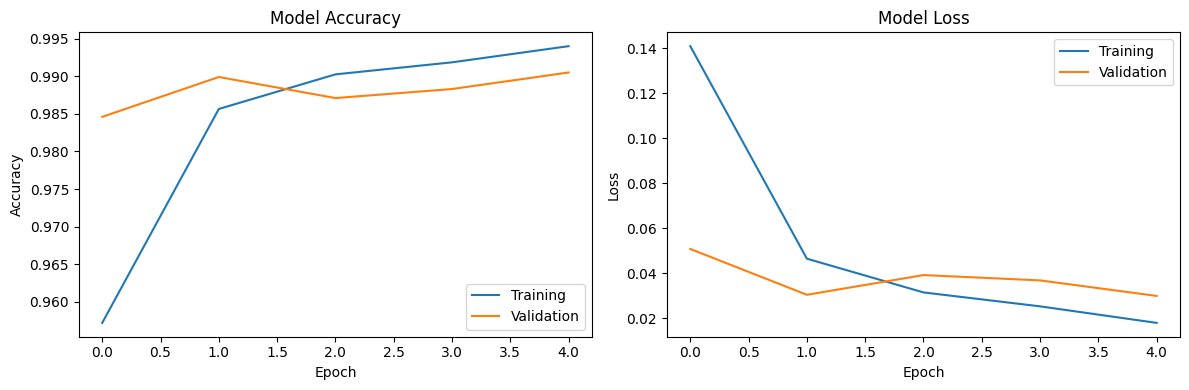

In [ ]:
# Cell 7: Plot Training History
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save('my_cnn_model.keras')
print("Model saved as 'my_cnn_model.keras'")

Model saved as 'my_cnn_model.keras'


In [ ]:
# Cell 9: Load and Test Saved Model
# Load the model
loaded_model = keras.models.load_model('my_cnn_model.keras')

# Test it
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Loaded model accuracy: {test_accuracy:.4f}")

Loaded model accuracy: 0.9905


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


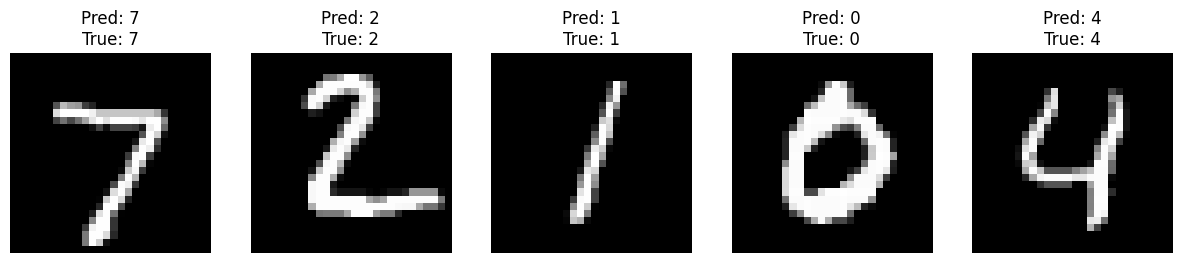

In [ ]:
# Cell 10: Make Predictions (Fixed)
# Predict on a few test images
predictions = loaded_model.predict(x_test[:5])

# Show results
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}\nTrue: {y_test[i]}")  # ✅ Removed [0]
    plt.axis('off')
plt.show()